In [2]:
import pandas as pd # for data handling

from sklearn.model_selection import train_test_split # for splitting data
from sklearn.svm import SVC # SVM classifier
from sklearn.linear_model import LogisticRegression # logisitic classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline # creating pipeling
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import matplotlib.pyplot as plt # for plotting data
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [5]:
encoder = LabelEncoder()

df.Sex = encoder.fit_transform(df.Sex)

<AxesSubplot:>

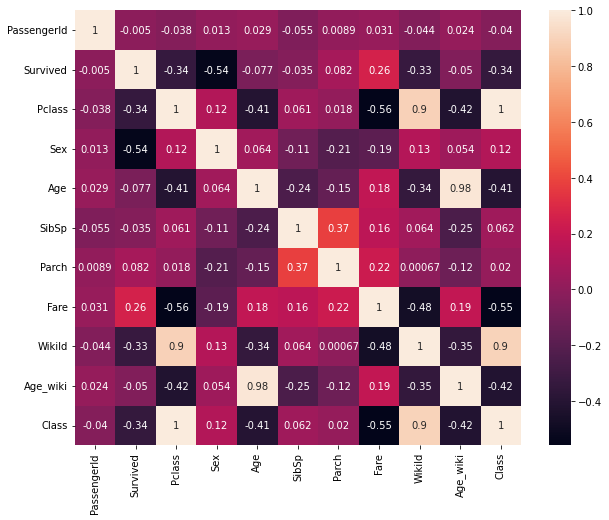

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [7]:
df1 = df.drop(columns=["Age_wiki", "WikiId", "Parch", "PassengerId", "Hometown", "Boarded", "Name_wiki", "Name", "Cabin", "Destination", "Lifeboat", "Body", "Embarked", "Ticket"])

df1.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Class
0,0.0,3,1,22.0,1,7.2500,3.0
1,1.0,1,0,38.0,1,71.2833,1.0
2,1.0,3,0,26.0,0,7.9250,3.0
3,1.0,1,0,35.0,1,53.1000,1.0
4,0.0,3,1,35.0,0,8.0500,3.0


In [8]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Class
count,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1308.000000,1304.000000
mean,0.383838,2.294882,0.644003,29.881138,0.498854,33.295479,2.291411
std,0.486592,0.837836,0.478997,14.413493,1.041658,51.758668,0.840852
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,7.895800,1.750000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,31.275000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,512.329200,3.000000


<AxesSubplot:>

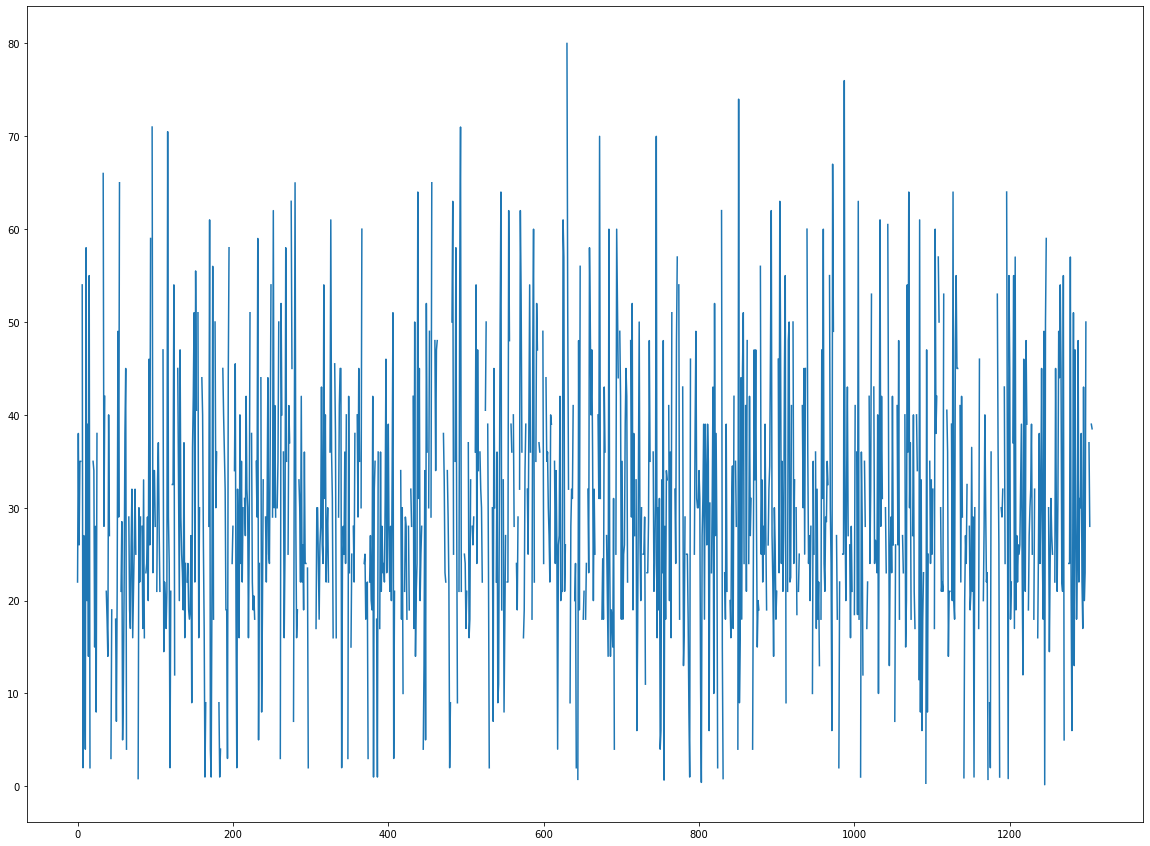

In [9]:
df1.Age.plot(figsize=(20, 15))

In [10]:
df1 = df1[~df1.Survived.isna()]

df1.Age = df1.Age.fillna(df1.Age.mean())
df1.Class = df1.Class.fillna(df1.Class.mean())

df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Class       0
dtype: int64

In [11]:
X = df1.drop(columns=["Survived"])
y = df1.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="poly", probability=True, degree=10))
])

svc_model.fit(X_train, y_train)


svc_model.score(X_test, y_test)

0.7318435754189944

In [13]:
log_model = Pipeline([
    ("logistic", LogisticRegression())
])

log_model.fit(X_train, y_train)

log_model.score(X_test, y_test)

0.8044692737430168

In [14]:
dec_model = Pipeline([
    ("logistic", DecisionTreeClassifier())
])

dec_model.fit(X_train, y_train)

dec_model.score(X_test, y_test)

0.7597765363128491

In [15]:
rnd_model = Pipeline([
    ("logistic", RandomForestClassifier())
])

rnd_model.fit(X_train, y_train)

rnd_model.score(X_test, y_test)

0.8268156424581006

In [18]:
gsnb_model = Pipeline([
    ("gauss_nb", GaussianNB())
])

gsnb_model.fit(X_train, y_train)

gsnb_model.score(X_test, y_test)

0.770949720670391